In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from random import random
import math

%matplotlib inline

Construct a list of tuples (t, x (E-W), y (N-S))

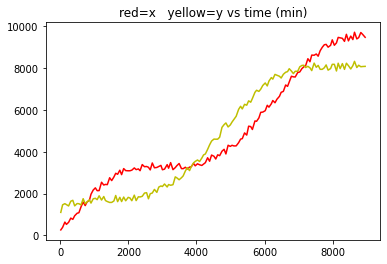

In [ ]:
Npts = 150
v = 1  #meters/min
Rvecs = np.zeros((Npts, 3))
for i in range(Npts):
    t = int(i * 60 + random()*20)
    x = v*t +int(1000*math.sin(t/1000) + random()*400)
    y = v*t +int(1000*math.cos(t/1000) + random()*400)
    Rvecs[i] = (t,x,y)
plt.title("red=x   yellow=y vs time (min)")
plt.plot(Rvecs[:,0], Rvecs[:,1], 'r')
plt.plot(Rvecs[:,0], Rvecs[:,2], 'y')

Plot x,y path

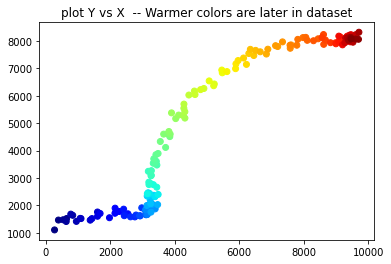

In [ ]:
plt.title("plot Y vs X  -- Warmer colors are later in dataset")
plt.scatter(Rvecs[:,1], Rvecs[:,2], c = Rvecs[:,0], cmap='jet')

Find enclosing ellipse for specified points along the path

In [ ]:
def enclose(Rvecs, tIdxStart, npts):
    pCentroid = [np.mean(Rvecs[tIdxStart: tIdxStart+npts][:,1]), np.mean(Rvecs[tIdxStart: tIdxStart+npts][:,2])]
    idxFar = 0  # this will be the index of the point most distant from pCentroid
    mostfar = 0
    x = np.zeros((npts))
    y = np.zeros((npts))
    for i in range(npts):
        x[i] = (Rvecs[tIdxStart + i][1] - pCentroid[0])
        y[i] = (Rvecs[tIdxStart + i][2] - pCentroid[1])
        d2 = x[i]**2 + y[i]**2
        if d2 > mostfar:
            mostfar = d2
            idxFar =  i
#        print("i=",i, x[i], y[i], "d", math.sqrt(d2))
    a = 1.01 * math.sqrt(mostfar)
    theta = math.atan2(y[idxFar], x[idxFar])
    xp = np.zeros((npts))
    yp = np.zeros((npts))
    bmax = 0
    for i in range(npts):
        xp[i] = x[i]*math.cos(theta) + y[i]*math.sin(theta)
        yp[i] = -x[i]*math.sin(theta) + y[i] * math.cos(theta)
        b = yp[i]/math.sqrt(1-(xp[i]/a)**2)
        if b > bmax:
            bmax = b

    return pCentroid, a, bmax, theta


Calculate enclosing ellipse

In [ ]:
def calcEllipse(centroid, a, b, N):
    xell = np.zeros((2*N))
    yell = np.zeros((2*N))
    xp = np.zeros((N))
    yp = np.zeros((N))
    j=0
    for i in range(N):
        th = i * 6.28 / N  # angle
        xp[i]  = a * math.cos(th)
        yp[i]  = b * math.sqrt(1 - (xp[i]/a)**2)
        xell[j] = centroid[0] + xp[i]*math.cos(theta) - yp[i]*math.sin(theta)
        yell[j] = centroid[1] + xp[i] * math.sin(theta) + yp[i] * math.cos(theta)
        xell[j+1] = centroid[0] + xp[i]*math.cos(theta) + yp[i]*math.sin(theta)
        yell[j+1] = centroid[1] + xp[i] * math.sin(theta) - yp[i] * math.cos(theta)
        j += 2
    return xell, yell

Move along the path calculating ellipses and plotting them

centroid (1276, 1574) a 1125.77  b 502.63 thetaDeg -155.1
centroid (2909, 1734) a 519.80  b 418.68 thetaDeg 165.7
centroid (3286, 2301) a 553.62  b 218.84 thetaDeg -92.8
centroid (3511, 3889) a 1393.28  b 156.33 thetaDeg 68.1
centroid (4832, 6137) a 1496.11  b 205.00 thetaDeg 44.1
centroid (7018, 7713) a 1148.06  b 403.80 thetaDeg -158.2
centroid (8938, 8046) a 836.99  b 199.52 thetaDeg -178.8


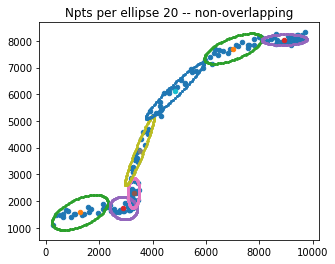

In [ ]:
npts = 20

x = Rvecs[:,1]
y = Rvecs[:,2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.title("Npts per ellipse {} -- non-overlapping".format(npts))
plt.scatter(x, y, s=20)
for tIdxStart in range(0, len(Rvecs[:,1])-npts, npts):
    centroid, a, b, theta = enclose(Rvecs, tIdxStart, npts)
    print("centroid {} a {:0.2f}  b {:0.2f} thetaDeg {:0.1f}".format((int(centroid[0]), int(centroid[1])), a, b, theta*180/3.14))
    xell, yell = calcEllipse(centroid, a, b, 100)
    plt.scatter(centroid[0], centroid[1], s=20)
    plt.scatter(xell, yell, s = 3)

